<a href="https://colab.research.google.com/github/lucaskatata/sigmoidal_data_science/blob/main/Lucas_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Boston*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Boston, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ma/boston/2022-09-15/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número identificador do imóvel
* `name` - nome do imóvel anunciado
* `host_id` - número identificador do proprietário (anfitrião) da propriedade
* `host_name` - Nome do proprietário
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude do imóvel
* `longitude` - coordenada da longitude do imóvel
* `room_type` - informa o tipo do imóvel
* `price` - preço para locação
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de avaliações (reviews) que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo proprietário
* `availability_365` - quantidade de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - quantidade de avaliações nos últimos 12 meses
* `license` - licença do imóvel


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3168,TudorStudio,3697,Mark,NaN,Brighton,42.35148,-71.19319,Private room,99,91,0,NaN,NaN,1,288,0,NaN
1,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,132,32,23,2022-05-29,0.26,1,168,2,NaN
2,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,149,3,113,2022-07-11,0.69,10,45,5,Approved by the government
3,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,179,3,119,2022-09-10,0.75,10,59,4,STR446650
4,7903,"Colorful, modern 2 BR apt shared with host",14169,Stacy,NaN,Charlestown,42.39031,-71.09361,Private room,116,4,295,2022-09-06,1.84,1,9,17,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificar o volume de dados do DataFrame
print('Entrada:\t{}'.format(df.shape[0]))
print('Variáveis:\t{}'.format(df.shape[1]))
print(' ')

# verificar as 5 primeiras entradas do dataset
df.dtypes

Entrada:	5185
Variáveis:	18
 


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
#neighbourhood_group: NaN em todas as linhas

neighbourhood_group               1.000000
license                           0.543298
reviews_per_month                 0.236258
last_review                       0.236258
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

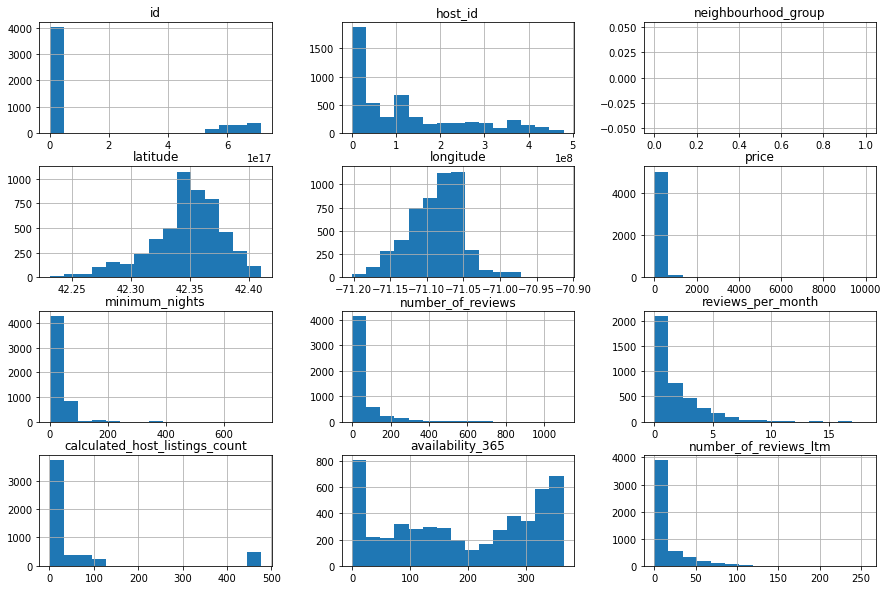

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10)); #presença do ; para mostrar apenas os gráficos

### **Q4. Há *outliers* presentes?**

In [9]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5185.000000,5185.000000,5185.000000,3960.000000,5185.000000,5185.000000,5185.000000
mean,230.596914,27.410415,47.312825,1.805780,62.285632,189.710704,13.194600
std,306.198549,38.277351,88.400462,2.000066,135.185395,126.458409,22.819485
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,100.000000,2.000000,1.000000,0.310000,2.000000,77.000000,0.000000
50%,179.000000,10.000000,9.000000,1.060000,6.000000,187.000000,2.000000
75%,275.000000,32.000000,54.000000,2.660000,45.000000,315.000000,17.000000
max,10000.000000,730.000000,1100.000000,18.110000,477.000000,365.000000,256.000000


A partir do resumo estatístico gerado com a função *describe*, podemos levantar alguns pontos: 


*   A variável `price` possui 75% do valor abaixo de 275, porém o seu valor máximo é 10000.
*   O valor máximo da variável  `minimum_nights` é 730, sendo o valor muito além do esperado para a variável.

#### **Boxplot para `price`**

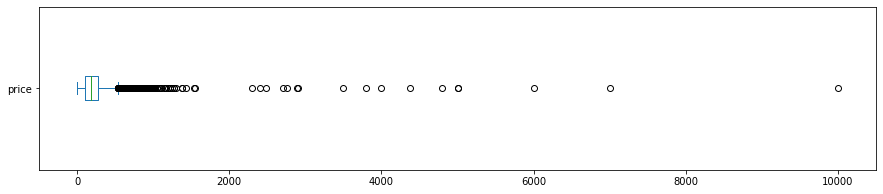


price: valores acima de 1000
44 entradas
0.8486%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1000 para price
preco_limite = 1000
print("\nprice: valores acima de {}".format(preco_limite))
print("{} entradas".format(len(df[df.price > preco_limite])))
print("{:.4f}%".format((len(df[df.price > preco_limite]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### **Boxplot para `minimum_nights`**

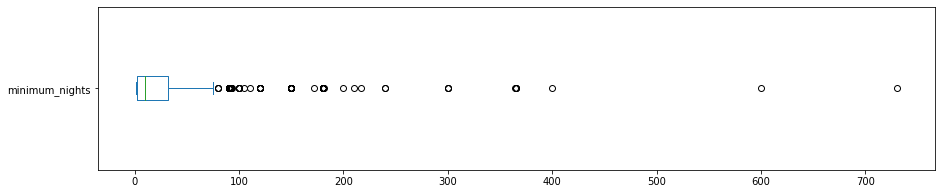

minimum_nights: valores acima de 150:
31 entradas
0.5979%


In [11]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 150 dias para minimum_nights
limite_dias = 150
print("minimum_nights: valores acima de {}:".format(limite_dias))
print("{} entradas".format(len(df[df.minimum_nights > limite_dias])))
print("{:.4f}%".format((len(df[df.minimum_nights > limite_dias]) / df.shape[0])*100))

#### **Histograma sem *outliers* - `price` e `minimum_nights`** 

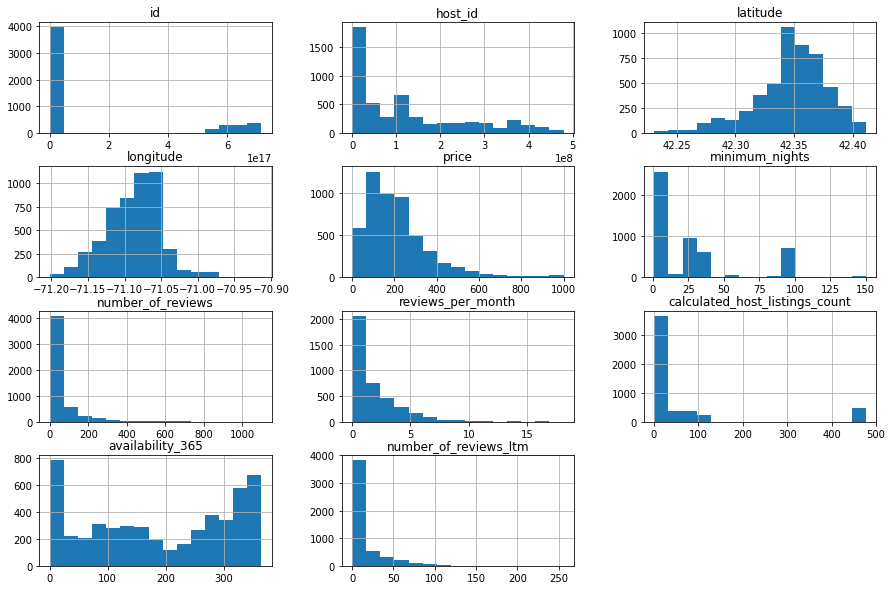

In [12]:
# remover os *outliers* em um novo DataFrame - df_clean
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > preco_limite].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > limite_dias].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


In [13]:
# resumo estatístico das variáveis numéricas após retirada outliers
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5111.000000,5111.000000,5111.000000,3913.000000,5111.000000,5111.000000,5111.000000
mean,212.778908,26.090785,47.625905,1.816080,63.060849,189.967521,13.324007
std,154.683564,32.334522,88.679712,2.004603,135.989065,126.224297,22.902232
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,100.000000,2.000000,1.000000,0.310000,2.000000,77.000000,0.000000
50%,178.000000,10.000000,10.000000,1.070000,6.000000,188.000000,2.000000
75%,270.500000,32.000000,55.000000,2.670000,47.000000,315.000000,18.000000
max,1000.000000,150.000000,1100.000000,18.110000,477.000000,365.000000,256.000000


### **Q5. Qual a média dos preços de aluguel?**

In [14]:
# ver a média da coluna `price``
print('O valor médio da variável price é: {}'.format(df_clean.price.mean()))

O valor médio da variável price é: 212.7789082371356


### **Q6. Qual a correlação existente entre as variáveis**

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.272715,-0.049293,0.090367,0.074725,0.141205
minimum_nights,-0.272715,1.000000,-0.270511,-0.426466,0.069407,-0.105661
number_of_reviews,-0.049293,-0.270511,1.000000,0.582051,-0.204181,-0.061419
reviews_per_month,0.090367,-0.426466,0.582051,1.000000,-0.115143,-0.027873
calculated_host_listings_count,0.074725,0.069407,-0.204181,-0.115143,1.000000,0.170221
availability_365,0.141205,-0.105661,-0.061419,-0.027873,0.170221,1.000000


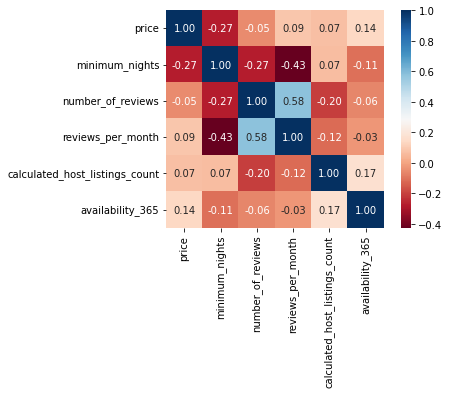

In [16]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3357
Private room       1713
Shared room          21
Hotel room           20
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.647445
Private room       0.330376
Shared room        0.004050
Hotel room         0.003857
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**



In [19]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Chinatown                  381.738636
Back Bay                   336.329630
South Boston Waterfront    324.434783
Downtown                   300.489914
Harbor Islands             279.166667
West End                   275.396552
Fenway                     270.406639
North End                  261.422222
South End                  258.988235
Beacon Hill                232.715190
Name: price, dtype: float64

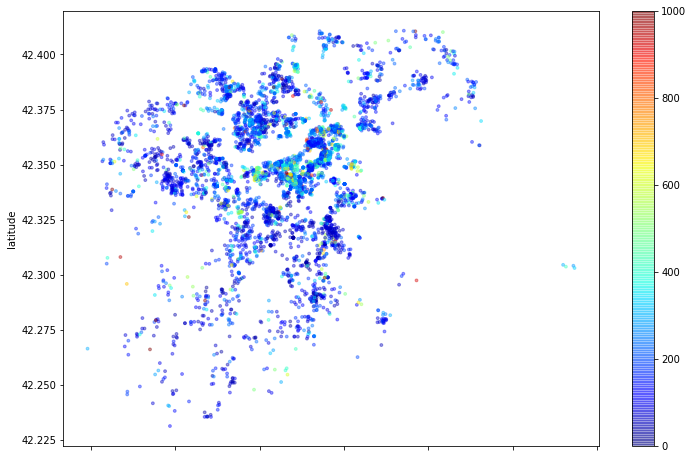

In [20]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [21]:
# ver a média da coluna `minimum_nights`
print('A média da variável minimum_nights é: {}'.format(df_clean.minimum_nights.mean()))

A média da variável minimum_nights é: 26.09078458227353


In [23]:
# Quantidade de imóveis por bairro
df_clean.neighbourhood.value_counts()

Allston                    744
Dorchester                 452
Charlestown                427
Brighton                   410
Downtown                   347
East Boston                341
Roxbury                    295
Back Bay                   270
South End                  255
Fenway                     241
Jamaica Plain              219
Beacon Hill                158
South Boston               146
West End                   116
Mission Hill                90
North End                   90
Chinatown                   88
West Roxbury                67
Hyde Park                   65
Roslindale                  63
Longwood Medical Area       61
Mattapan                    52
Bay Village                 51
South Boston Waterfront     46
Harbor Islands              12
Leather District             5
Name: neighbourhood, dtype: int64

## Conclusões
Através da análise realizada a partir dos dados do Airbnb da cidade de Boston - EUA, pode-se notar a presença de *outliers* em algumas variáveis. 
Alguns dados interessantes foram colhidos no processo, como: 

*   A média mínima de noites para locação é de 26,09 dias, um resultado bem diferente das locações na cidade do Rio de Janeiro - Brasil. Seria interessante analisar os dados de outra cidade norte-americana para verificar a mesma ocorrência. 
*   Diferentemente da análise da cidade do Rio de Janeiro, a presença de mais imóveis por bairro gera um resultado mais fiel dos preço médio. 

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.